In [1]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points
from pyproj import Transformer
from shapely import Point, wkt
import pandas as pd
import os
import rasterio 
from rasterio.plot import show

In [2]:
windspeed = rasterio.open(r"D:\Downloads\IND_wind-speed_50m.tif")

In [4]:
gdf = gpd.read_file(r"D:\CS\GitHub\Nuclear-Site-Selection\grid_points_for_dam\Aad_Dam")
dams = pd.read_csv(r"D:\CS\GitHub\Nuclear-Site-Selection\dam\dam.csv")

In [5]:
windspeed_data = windspeed.read(1)

In [6]:
transformer = Transformer.from_crs(gdf.crs, "epsg:4326", always_xy=True) # type: ignore

In [7]:
base_dir = r'D:\CS\GitHub\Nuclear-Site-Selection\gridpoints_csv_dams'

def read_windspeed(dam_name):
    safe_dam_name = dam_name.replace(' ','_').replace('/','_').replace(':','').replace('\n','_').replace("?","")
    folder_path = os.path.join(base_dir,safe_dam_name)
    folder_path+='.csv'
    gridpoints = pd.read_csv(folder_path)
    gridpoints['windspeed_at_50m'] = 0
    for index, row in gridpoints.iterrows():
        point = wkt.loads(row['geometry'])  # Parse the geometry column
        longitude = point.x
        latitude = point.y
        original_longitude, original_latitude = point.x, point.y

        # Convert the coordinates to EPSG:4326
        longitude, latitude = transformer.transform(original_longitude, original_latitude)

        row_index, col_index = windspeed.index(longitude, latitude)
        if windspeed_data[row_index,col_index]>0:
            gridpoints.at[index,''] = windspeed_data[row_index,col_index] 
        else:
            gridpoints.at[index,'windspeed_at_50m'] = 0

    avg_windspeed = gridpoints['windspeed_at_50m'].mean()
    dams.loc[dams['dm_name'] == dam_name, 'Avg_windspeed_at_50m'] = avg_windspeed
    gridpoints.to_csv(folder_path)
    


In [8]:
read_windspeed('Aad Dam')

In [9]:
dam_csv = pd.read_csv(r"D:\CS\GitHub\Nuclear-Site-Selection\gridpoints_csv_dams\Aad_Dam.csv")

In [37]:
dam_csv

,Unnamed: 0.1,Unnamed: 0,dam_id,STATE,geometry,population,nearest_airport,distance_to_nearest_airport_km,windspeed_at_50m,Unnamed: 9
0,0,0,Aad Dam,MAHARASHTRA,POINT (3333625.1089999974 3600497.4990000017),214.729874,"Nashik Airport, Ojhar",40.141438,0,4.884130
1,1,1,Aad Dam,MAHARASHTRA,POINT (3333625.1089999974 3601497.4990000017),223.124924,"Nashik Airport, Ojhar",40.384344,0,3.149429
2,2,2,Aad Dam,MAHARASHTRA,POINT (3333625.1089999974 3602497.4990000017),146.727386,"Nashik Airport, Ojhar",40.650405,0,3.376993
3,3,3,Aad Dam,MAHARASHTRA,POINT (3333625.1089999974 3603497.4990000017),153.979294,"Nashik Airport, Ojhar",40.939169,0,4.560332
4,4,4,Aad Dam,MAHARASHTRA,POINT (3333625.1089999974 3604497.4990000017),154.121307,"Nashik Airport, Ojhar",41.250161,0,3.997182
...,...,...,...,...,...,...,...,...,...,...
242,242,242,Aad Dam,MAHARASHTRA,POINT (3351625.1089999974 3607497.4990000017),170.899353,"Nashik Airport, Ojhar",26.614136,0,5.280328
243,243,243,Aad Dam,MAHARASHTRA,POINT (3352625.1089999974 3602497.4990000017),183.064301,"Nashik Airport, Ojhar",23.008767,0,5.385048
244,244,244,Aad Dam,MAHARASHTRA,POINT (3352625.1089999974 3603497.4990000017),193.780762,"Nashik Airport, Ojhar",23.515176,0,5.645142
245,245,245,Aad Dam,MAHARASHTRA,POINT (3352625.1089999974 3604497.4990000017),158.986542,"Nashik Airport, Ojhar",24.052520,0,5.606565


In [10]:
dams

,Unnamed: 0,dm_name,STATE_1,dm_lat,dm_long,dm_ses_zon,geometry,Avg_population,nearest_airport,distance_to_nearest_airport_km,Avg_windspeed_at_50m
0,0,Ajan Dam,BIHAR,25.033185,86.295520,Seismic Zone-IV,POINT (4622889.0973000005 4126138.3808999993),538.215336,"Atal Bihari Vajpayee International Airport, Si...",85.013332,NaN
1,1,Amrity Dam,BIHAR,24.889893,86.101464,Seismic Zone-IV,POINT (4604374.947700001 4109742.2074999996),831.957676,"Atal Bihari Vajpayee International Airport, Si...",86.238498,NaN
2,2,Badua Dam,BIHAR,24.887072,86.645950,Seismic Zone-IV,POINT (4658284.6098000035 4111875.8922000006),735.990780,"Atal Bihari Vajpayee International Airport, Si...",54.301341,NaN
3,3,Ahraura Dam,UTTAR PRADESH,25.000400,83.035647,Seismic Zone-III,POINT (4300505.322700001 4111895.7787999995),525.465066,"Lal Bahadur Shastri International Airport, Var...",58.654502,NaN
4,4,Maudaha (Swami Brahmanand ) Dam,UTTAR PRADESH,25.588776,79.707894,Seismic Zone-II,POINT (3971214.0732000023 4172614.835000001),256.918575,"Khajuraho Airport, Khajuraho",98.438675,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5614,5614,Ghoghri Dam,MADHYA PRADESH,21.722910,77.931928,NaN,POINT (3790043.5779 3754215.767499998),117.735819,"Dr. Babasaheb Ambedkar International Airport, ...",146.050562,NaN
5615,5615,Kesli Dam,MADHYA PRADESH,23.400320,78.790828,NaN,POINT (3878802.2476999983 3935394.917800002),206.101857,"Jabalpur Airport, Jabalpur",143.543884,NaN
5616,5616,Sonpur Dam,MADHYA PRADESH,23.388370,78.707888,NaN,POINT (3870477.265900001 3934170.967799999),172.484460,"Lalitpur Airport, Lalitpur",164.609632,NaN
5617,5617,Surajpura Dam,MADHYA PRADESH,23.515067,78.740555,NaN,POINT (3873874.817599997 3947900.0031999983),335.399006,"Lalitpur Airport, Lalitpur",150.367778,NaN


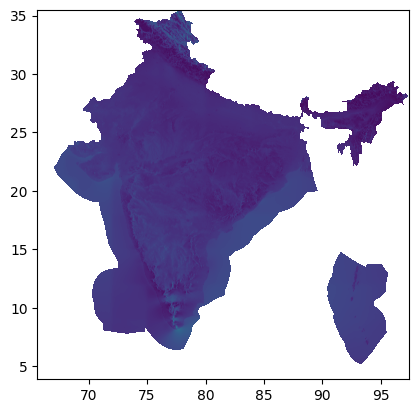

<Axes: >

In [7]:
show(windspeed)